## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 66.9ms	remaining: 1m 6s
1:	learn: 0.9301086	total: 70.8ms	remaining: 35.3s
2:	learn: 0.9005637	total: 74.1ms	remaining: 24.6s
3:	learn: 0.8720983	total: 77.2ms	remaining: 19.2s
4:	learn: 0.8467410	total: 79.8ms	remaining: 15.9s
5:	learn: 0.8226672	total: 82.6ms	remaining: 13.7s
6:	learn: 0.7994702	total: 85.2ms	remaining: 12.1s
7:	learn: 0.7784272	total: 87.9ms	remaining: 10.9s
8:	learn: 0.7602192	total: 90.9ms	remaining: 10s
9:	learn: 0.7412421	total: 93.7ms	remaining: 9.28s
10:	learn: 0.7247930	total: 96.6ms	remaining: 8.69s
11:	learn: 0.7089951	total: 99.7ms	remaining: 8.21s
12:	learn: 0.6951345	total: 103ms	remaining: 7.79s
13:	learn: 0.6809276	total: 105ms	remaining: 7.42s
14:	learn: 0.6692630	total: 108ms	remaining: 7.1s
15:	learn: 0.6588323	total: 111ms	remaining: 6.84s
16:	learn: 0.6472700	total: 114ms	remaining: 6.59s
17:	learn: 0.6379982	total: 117ms	remaining: 6.36s
18:	learn: 0.6294674	total: 119ms	remaining: 6.16s
19

42:	learn: 0.5141148	total: 187ms	remaining: 4.16s
43:	learn: 0.5116444	total: 190ms	remaining: 4.13s
44:	learn: 0.5100547	total: 193ms	remaining: 4.09s
45:	learn: 0.5069096	total: 195ms	remaining: 4.05s
46:	learn: 0.5051685	total: 198ms	remaining: 4.02s
47:	learn: 0.5033968	total: 201ms	remaining: 3.98s
48:	learn: 0.5012433	total: 203ms	remaining: 3.94s
49:	learn: 0.4986132	total: 206ms	remaining: 3.92s
50:	learn: 0.4968022	total: 209ms	remaining: 3.89s
51:	learn: 0.4951632	total: 212ms	remaining: 3.86s
52:	learn: 0.4928924	total: 215ms	remaining: 3.83s
53:	learn: 0.4917272	total: 217ms	remaining: 3.81s
54:	learn: 0.4895079	total: 220ms	remaining: 3.78s
55:	learn: 0.4881884	total: 223ms	remaining: 3.75s
56:	learn: 0.4861566	total: 225ms	remaining: 3.73s
57:	learn: 0.4850201	total: 228ms	remaining: 3.71s
58:	learn: 0.4840055	total: 231ms	remaining: 3.69s
59:	learn: 0.4824455	total: 234ms	remaining: 3.66s
60:	learn: 0.4809744	total: 237ms	remaining: 3.64s
61:	learn: 0.4801376	total: 239

107:	learn: 0.4447909	total: 381ms	remaining: 3.15s
108:	learn: 0.4440936	total: 384ms	remaining: 3.14s
109:	learn: 0.4435519	total: 387ms	remaining: 3.13s
110:	learn: 0.4431075	total: 390ms	remaining: 3.13s
111:	learn: 0.4425498	total: 393ms	remaining: 3.12s
112:	learn: 0.4419106	total: 397ms	remaining: 3.11s
113:	learn: 0.4414425	total: 400ms	remaining: 3.1s
114:	learn: 0.4407446	total: 403ms	remaining: 3.1s
115:	learn: 0.4402011	total: 406ms	remaining: 3.09s
116:	learn: 0.4398559	total: 409ms	remaining: 3.08s
117:	learn: 0.4392990	total: 411ms	remaining: 3.08s
118:	learn: 0.4389153	total: 415ms	remaining: 3.07s
119:	learn: 0.4383331	total: 418ms	remaining: 3.06s
120:	learn: 0.4378136	total: 421ms	remaining: 3.06s
121:	learn: 0.4375553	total: 424ms	remaining: 3.05s
122:	learn: 0.4369995	total: 427ms	remaining: 3.04s
123:	learn: 0.4366325	total: 430ms	remaining: 3.03s
124:	learn: 0.4362823	total: 432ms	remaining: 3.03s
125:	learn: 0.4359535	total: 435ms	remaining: 3.02s
126:	learn: 0.

170:	learn: 0.4161870	total: 573ms	remaining: 2.78s
171:	learn: 0.4156228	total: 576ms	remaining: 2.77s
172:	learn: 0.4153041	total: 579ms	remaining: 2.77s
173:	learn: 0.4148857	total: 582ms	remaining: 2.76s
174:	learn: 0.4144190	total: 585ms	remaining: 2.76s
175:	learn: 0.4140875	total: 588ms	remaining: 2.75s
176:	learn: 0.4136755	total: 591ms	remaining: 2.75s
177:	learn: 0.4133860	total: 594ms	remaining: 2.74s
178:	learn: 0.4129780	total: 597ms	remaining: 2.74s
179:	learn: 0.4122907	total: 601ms	remaining: 2.74s
180:	learn: 0.4119188	total: 604ms	remaining: 2.73s
181:	learn: 0.4115412	total: 607ms	remaining: 2.73s
182:	learn: 0.4112620	total: 609ms	remaining: 2.72s
183:	learn: 0.4107734	total: 613ms	remaining: 2.72s
184:	learn: 0.4104881	total: 616ms	remaining: 2.71s
185:	learn: 0.4100009	total: 619ms	remaining: 2.71s
186:	learn: 0.4096453	total: 622ms	remaining: 2.7s
187:	learn: 0.4093395	total: 625ms	remaining: 2.7s
188:	learn: 0.4090020	total: 628ms	remaining: 2.69s
189:	learn: 0.

233:	learn: 0.3949269	total: 763ms	remaining: 2.5s
234:	learn: 0.3945894	total: 766ms	remaining: 2.49s
235:	learn: 0.3944181	total: 769ms	remaining: 2.49s
236:	learn: 0.3941497	total: 772ms	remaining: 2.49s
237:	learn: 0.3939819	total: 776ms	remaining: 2.48s
238:	learn: 0.3938322	total: 779ms	remaining: 2.48s
239:	learn: 0.3935463	total: 781ms	remaining: 2.47s
240:	learn: 0.3933166	total: 784ms	remaining: 2.47s
241:	learn: 0.3930992	total: 787ms	remaining: 2.47s
242:	learn: 0.3928898	total: 790ms	remaining: 2.46s
243:	learn: 0.3926199	total: 793ms	remaining: 2.46s
244:	learn: 0.3923955	total: 796ms	remaining: 2.45s
245:	learn: 0.3922312	total: 799ms	remaining: 2.45s
246:	learn: 0.3919499	total: 802ms	remaining: 2.44s
247:	learn: 0.3917420	total: 805ms	remaining: 2.44s
248:	learn: 0.3915186	total: 807ms	remaining: 2.44s
249:	learn: 0.3912759	total: 810ms	remaining: 2.43s
250:	learn: 0.3908375	total: 813ms	remaining: 2.43s
251:	learn: 0.3904815	total: 816ms	remaining: 2.42s
252:	learn: 0

297:	learn: 0.3799439	total: 958ms	remaining: 2.26s
298:	learn: 0.3797228	total: 961ms	remaining: 2.25s
299:	learn: 0.3795554	total: 964ms	remaining: 2.25s
300:	learn: 0.3793733	total: 968ms	remaining: 2.25s
301:	learn: 0.3791607	total: 970ms	remaining: 2.24s
302:	learn: 0.3789297	total: 973ms	remaining: 2.24s
303:	learn: 0.3787482	total: 976ms	remaining: 2.23s
304:	learn: 0.3786528	total: 979ms	remaining: 2.23s
305:	learn: 0.3784406	total: 982ms	remaining: 2.23s
306:	learn: 0.3782934	total: 986ms	remaining: 2.23s
307:	learn: 0.3781631	total: 989ms	remaining: 2.22s
308:	learn: 0.3779278	total: 992ms	remaining: 2.22s
309:	learn: 0.3777358	total: 995ms	remaining: 2.21s
310:	learn: 0.3775809	total: 998ms	remaining: 2.21s
311:	learn: 0.3774323	total: 1s	remaining: 2.21s
312:	learn: 0.3772732	total: 1s	remaining: 2.2s
313:	learn: 0.3771184	total: 1s	remaining: 2.2s
314:	learn: 0.3769370	total: 1.01s	remaining: 2.19s
315:	learn: 0.3766643	total: 1.01s	remaining: 2.19s
316:	learn: 0.3764891	t

358:	learn: 0.3687886	total: 1.15s	remaining: 2.05s
359:	learn: 0.3686485	total: 1.15s	remaining: 2.05s
360:	learn: 0.3685749	total: 1.16s	remaining: 2.04s
361:	learn: 0.3683909	total: 1.16s	remaining: 2.04s
362:	learn: 0.3682710	total: 1.16s	remaining: 2.04s
363:	learn: 0.3681254	total: 1.16s	remaining: 2.03s
364:	learn: 0.3679761	total: 1.17s	remaining: 2.03s
365:	learn: 0.3677932	total: 1.17s	remaining: 2.02s
366:	learn: 0.3676022	total: 1.17s	remaining: 2.02s
367:	learn: 0.3674148	total: 1.18s	remaining: 2.02s
368:	learn: 0.3673439	total: 1.18s	remaining: 2.01s
369:	learn: 0.3671985	total: 1.18s	remaining: 2.01s
370:	learn: 0.3670563	total: 1.18s	remaining: 2.01s
371:	learn: 0.3669128	total: 1.19s	remaining: 2s
372:	learn: 0.3668381	total: 1.19s	remaining: 2s
373:	learn: 0.3666564	total: 1.19s	remaining: 2s
374:	learn: 0.3663789	total: 1.2s	remaining: 1.99s
375:	learn: 0.3661576	total: 1.2s	remaining: 1.99s
376:	learn: 0.3659742	total: 1.2s	remaining: 1.99s
377:	learn: 0.3658330	to

421:	learn: 0.3586831	total: 1.34s	remaining: 1.84s
422:	learn: 0.3585620	total: 1.34s	remaining: 1.83s
423:	learn: 0.3584427	total: 1.35s	remaining: 1.83s
424:	learn: 0.3583044	total: 1.35s	remaining: 1.83s
425:	learn: 0.3581698	total: 1.35s	remaining: 1.82s
426:	learn: 0.3580461	total: 1.36s	remaining: 1.82s
427:	learn: 0.3579182	total: 1.36s	remaining: 1.82s
428:	learn: 0.3577521	total: 1.36s	remaining: 1.81s
429:	learn: 0.3576138	total: 1.36s	remaining: 1.81s
430:	learn: 0.3575528	total: 1.37s	remaining: 1.8s
431:	learn: 0.3574686	total: 1.37s	remaining: 1.8s
432:	learn: 0.3572923	total: 1.37s	remaining: 1.8s
433:	learn: 0.3571859	total: 1.38s	remaining: 1.79s
434:	learn: 0.3570185	total: 1.38s	remaining: 1.79s
435:	learn: 0.3568416	total: 1.38s	remaining: 1.79s
436:	learn: 0.3566846	total: 1.39s	remaining: 1.78s
437:	learn: 0.3565875	total: 1.39s	remaining: 1.78s
438:	learn: 0.3564768	total: 1.39s	remaining: 1.78s
439:	learn: 0.3563559	total: 1.39s	remaining: 1.77s
440:	learn: 0.3

487:	learn: 0.3494609	total: 1.53s	remaining: 1.61s
488:	learn: 0.3493200	total: 1.54s	remaining: 1.6s
489:	learn: 0.3491550	total: 1.54s	remaining: 1.6s
490:	learn: 0.3490323	total: 1.54s	remaining: 1.6s
491:	learn: 0.3488767	total: 1.54s	remaining: 1.59s
492:	learn: 0.3487285	total: 1.55s	remaining: 1.59s
493:	learn: 0.3486318	total: 1.55s	remaining: 1.59s
494:	learn: 0.3485016	total: 1.55s	remaining: 1.58s
495:	learn: 0.3484072	total: 1.56s	remaining: 1.58s
496:	learn: 0.3482698	total: 1.56s	remaining: 1.58s
497:	learn: 0.3481630	total: 1.56s	remaining: 1.57s
498:	learn: 0.3480855	total: 1.56s	remaining: 1.57s
499:	learn: 0.3478655	total: 1.57s	remaining: 1.57s
500:	learn: 0.3477966	total: 1.57s	remaining: 1.56s
501:	learn: 0.3476142	total: 1.57s	remaining: 1.56s
502:	learn: 0.3474667	total: 1.58s	remaining: 1.56s
503:	learn: 0.3473844	total: 1.58s	remaining: 1.55s
504:	learn: 0.3471852	total: 1.58s	remaining: 1.55s
505:	learn: 0.3471124	total: 1.58s	remaining: 1.55s
506:	learn: 0.3

554:	learn: 0.3408730	total: 1.72s	remaining: 1.38s
555:	learn: 0.3408310	total: 1.73s	remaining: 1.38s
556:	learn: 0.3407365	total: 1.73s	remaining: 1.38s
557:	learn: 0.3406506	total: 1.73s	remaining: 1.37s
558:	learn: 0.3405352	total: 1.73s	remaining: 1.37s
559:	learn: 0.3404352	total: 1.74s	remaining: 1.36s
560:	learn: 0.3403419	total: 1.74s	remaining: 1.36s
561:	learn: 0.3402836	total: 1.74s	remaining: 1.36s
562:	learn: 0.3402264	total: 1.75s	remaining: 1.35s
563:	learn: 0.3400466	total: 1.75s	remaining: 1.35s
564:	learn: 0.3399235	total: 1.75s	remaining: 1.35s
565:	learn: 0.3398064	total: 1.75s	remaining: 1.35s
566:	learn: 0.3396466	total: 1.76s	remaining: 1.34s
567:	learn: 0.3395531	total: 1.76s	remaining: 1.34s
568:	learn: 0.3394093	total: 1.76s	remaining: 1.34s
569:	learn: 0.3393241	total: 1.77s	remaining: 1.33s
570:	learn: 0.3392368	total: 1.77s	remaining: 1.33s
571:	learn: 0.3391373	total: 1.77s	remaining: 1.33s
572:	learn: 0.3390261	total: 1.77s	remaining: 1.32s
573:	learn: 

621:	learn: 0.3342275	total: 1.92s	remaining: 1.16s
622:	learn: 0.3341456	total: 1.92s	remaining: 1.16s
623:	learn: 0.3340640	total: 1.92s	remaining: 1.16s
624:	learn: 0.3339122	total: 1.92s	remaining: 1.15s
625:	learn: 0.3337503	total: 1.93s	remaining: 1.15s
626:	learn: 0.3336593	total: 1.93s	remaining: 1.15s
627:	learn: 0.3335713	total: 1.93s	remaining: 1.14s
628:	learn: 0.3333915	total: 1.94s	remaining: 1.14s
629:	learn: 0.3333158	total: 1.94s	remaining: 1.14s
630:	learn: 0.3332088	total: 1.94s	remaining: 1.14s
631:	learn: 0.3331129	total: 1.95s	remaining: 1.13s
632:	learn: 0.3330288	total: 1.95s	remaining: 1.13s
633:	learn: 0.3328844	total: 1.95s	remaining: 1.13s
634:	learn: 0.3328544	total: 1.95s	remaining: 1.12s
635:	learn: 0.3327021	total: 1.96s	remaining: 1.12s
636:	learn: 0.3326462	total: 1.97s	remaining: 1.12s
637:	learn: 0.3325758	total: 1.97s	remaining: 1.12s
638:	learn: 0.3324324	total: 1.97s	remaining: 1.11s
639:	learn: 0.3323174	total: 1.97s	remaining: 1.11s
640:	learn: 

685:	learn: 0.3278094	total: 2.11s	remaining: 964ms
686:	learn: 0.3277178	total: 2.11s	remaining: 961ms
687:	learn: 0.3276684	total: 2.11s	remaining: 958ms
688:	learn: 0.3275537	total: 2.11s	remaining: 954ms
689:	learn: 0.3274808	total: 2.12s	remaining: 951ms
690:	learn: 0.3273839	total: 2.12s	remaining: 948ms
691:	learn: 0.3272773	total: 2.12s	remaining: 945ms
692:	learn: 0.3272088	total: 2.13s	remaining: 942ms
693:	learn: 0.3271216	total: 2.13s	remaining: 938ms
694:	learn: 0.3270566	total: 2.13s	remaining: 935ms
695:	learn: 0.3269516	total: 2.13s	remaining: 932ms
696:	learn: 0.3267980	total: 2.14s	remaining: 929ms
697:	learn: 0.3266887	total: 2.14s	remaining: 925ms
698:	learn: 0.3265888	total: 2.14s	remaining: 922ms
699:	learn: 0.3265229	total: 2.15s	remaining: 920ms
700:	learn: 0.3264350	total: 2.15s	remaining: 917ms
701:	learn: 0.3263223	total: 2.15s	remaining: 914ms
702:	learn: 0.3262539	total: 2.15s	remaining: 911ms
703:	learn: 0.3261258	total: 2.16s	remaining: 908ms
704:	learn: 

749:	learn: 0.3221342	total: 2.3s	remaining: 766ms
750:	learn: 0.3220746	total: 2.3s	remaining: 762ms
751:	learn: 0.3219897	total: 2.3s	remaining: 759ms
752:	learn: 0.3218990	total: 2.31s	remaining: 756ms
753:	learn: 0.3218179	total: 2.31s	remaining: 753ms
754:	learn: 0.3217323	total: 2.31s	remaining: 750ms
755:	learn: 0.3216617	total: 2.31s	remaining: 747ms
756:	learn: 0.3216090	total: 2.32s	remaining: 744ms
757:	learn: 0.3215306	total: 2.32s	remaining: 741ms
758:	learn: 0.3214274	total: 2.32s	remaining: 738ms
759:	learn: 0.3212014	total: 2.33s	remaining: 735ms
760:	learn: 0.3211190	total: 2.33s	remaining: 731ms
761:	learn: 0.3210312	total: 2.33s	remaining: 728ms
762:	learn: 0.3209495	total: 2.33s	remaining: 725ms
763:	learn: 0.3208564	total: 2.34s	remaining: 722ms
764:	learn: 0.3207911	total: 2.34s	remaining: 719ms
765:	learn: 0.3206643	total: 2.34s	remaining: 716ms
766:	learn: 0.3205891	total: 2.35s	remaining: 713ms
767:	learn: 0.3204765	total: 2.35s	remaining: 710ms
768:	learn: 0.3

811:	learn: 0.3167047	total: 2.49s	remaining: 576ms
812:	learn: 0.3166132	total: 2.49s	remaining: 573ms
813:	learn: 0.3165391	total: 2.49s	remaining: 570ms
814:	learn: 0.3164726	total: 2.5s	remaining: 567ms
815:	learn: 0.3164087	total: 2.5s	remaining: 564ms
816:	learn: 0.3163590	total: 2.5s	remaining: 561ms
817:	learn: 0.3162644	total: 2.5s	remaining: 558ms
818:	learn: 0.3161739	total: 2.51s	remaining: 554ms
819:	learn: 0.3160986	total: 2.51s	remaining: 551ms
820:	learn: 0.3159951	total: 2.51s	remaining: 548ms
821:	learn: 0.3159403	total: 2.52s	remaining: 545ms
822:	learn: 0.3158160	total: 2.52s	remaining: 542ms
823:	learn: 0.3157523	total: 2.52s	remaining: 539ms
824:	learn: 0.3156673	total: 2.53s	remaining: 536ms
825:	learn: 0.3156288	total: 2.53s	remaining: 533ms
826:	learn: 0.3155257	total: 2.53s	remaining: 530ms
827:	learn: 0.3154546	total: 2.54s	remaining: 527ms
828:	learn: 0.3153664	total: 2.54s	remaining: 524ms
829:	learn: 0.3152896	total: 2.54s	remaining: 521ms
830:	learn: 0.31

872:	learn: 0.3120356	total: 2.68s	remaining: 389ms
873:	learn: 0.3119020	total: 2.68s	remaining: 386ms
874:	learn: 0.3118603	total: 2.68s	remaining: 383ms
875:	learn: 0.3117861	total: 2.69s	remaining: 380ms
876:	learn: 0.3116810	total: 2.69s	remaining: 377ms
877:	learn: 0.3116088	total: 2.69s	remaining: 374ms
878:	learn: 0.3115190	total: 2.69s	remaining: 371ms
879:	learn: 0.3114687	total: 2.7s	remaining: 368ms
880:	learn: 0.3113934	total: 2.7s	remaining: 365ms
881:	learn: 0.3113378	total: 2.7s	remaining: 362ms
882:	learn: 0.3112367	total: 2.71s	remaining: 359ms
883:	learn: 0.3111915	total: 2.71s	remaining: 356ms
884:	learn: 0.3111075	total: 2.71s	remaining: 353ms
885:	learn: 0.3110486	total: 2.72s	remaining: 350ms
886:	learn: 0.3109334	total: 2.72s	remaining: 347ms
887:	learn: 0.3108347	total: 2.72s	remaining: 343ms
888:	learn: 0.3107647	total: 2.73s	remaining: 340ms
889:	learn: 0.3107302	total: 2.73s	remaining: 337ms
890:	learn: 0.3106509	total: 2.73s	remaining: 334ms
891:	learn: 0.3

932:	learn: 0.3077165	total: 2.86s	remaining: 206ms
933:	learn: 0.3076207	total: 2.87s	remaining: 203ms
934:	learn: 0.3075333	total: 2.87s	remaining: 200ms
935:	learn: 0.3074829	total: 2.87s	remaining: 196ms
936:	learn: 0.3074088	total: 2.88s	remaining: 193ms
937:	learn: 0.3073356	total: 2.88s	remaining: 190ms
938:	learn: 0.3072158	total: 2.88s	remaining: 187ms
939:	learn: 0.3071693	total: 2.89s	remaining: 184ms
940:	learn: 0.3071043	total: 2.89s	remaining: 181ms
941:	learn: 0.3070506	total: 2.89s	remaining: 178ms
942:	learn: 0.3070046	total: 2.9s	remaining: 175ms
943:	learn: 0.3069525	total: 2.9s	remaining: 172ms
944:	learn: 0.3068968	total: 2.9s	remaining: 169ms
945:	learn: 0.3068564	total: 2.9s	remaining: 166ms
946:	learn: 0.3067279	total: 2.91s	remaining: 163ms
947:	learn: 0.3066517	total: 2.91s	remaining: 160ms
948:	learn: 0.3066014	total: 2.91s	remaining: 157ms
949:	learn: 0.3065250	total: 2.92s	remaining: 154ms
950:	learn: 0.3064465	total: 2.92s	remaining: 150ms
951:	learn: 0.30

993:	learn: 0.3034295	total: 3.05s	remaining: 18.4ms
994:	learn: 0.3033612	total: 3.06s	remaining: 15.4ms
995:	learn: 0.3033209	total: 3.06s	remaining: 12.3ms
996:	learn: 0.3032659	total: 3.06s	remaining: 9.21ms
997:	learn: 0.3032189	total: 3.06s	remaining: 6.14ms
998:	learn: 0.3031594	total: 3.07s	remaining: 3.07ms
999:	learn: 0.3030916	total: 3.07s	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.1158483896289675


#### Sanity Checks 

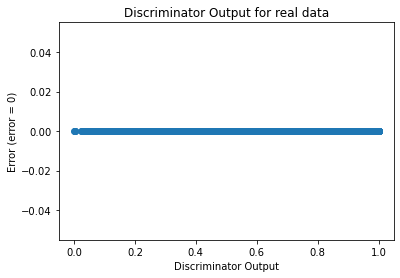

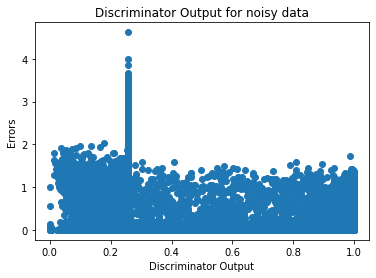

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)